In [2]:
!pip install ForceAtlas2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ForceAtlas2: filename=ForceAtlas2-1.0-cp310-cp310-linux_x86_64.whl size=202536 sha256=3ca9542e394010b37cb67a97674664544f7e39148f9679a3cadf62a4793cd81c
  Stored in directory: /root/.cache/pip/wheels/b1/45/28/7a67da390e882ee9d35e9f1fb58d091f9bab8f618be3370127
Successfully built ForceAtlas2


In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import datetime
import re

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PRE-PROCESS

In [5]:
df = pd.read_csv("/content/drive/MyDrive/tweets.csv")
print(df.columns)

# To check where most Nan values are from.
nan_df = df.isna()
nan_df

Index(['name', 'username', 'description', 'location', 'followers',
       'numberstatuses', 'time', 'tweets'],
      dtype='object')


,name,username,description,location,followers,numberstatuses,time,tweets
0,False,False,False,True,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...
17405,False,False,True,True,False,False,False,False
17406,False,False,True,True,False,False,False,False
17407,False,False,True,True,False,False,False,False
17408,False,False,True,True,False,False,False,False


In [6]:
# Beacause most of our NaN used to come from description and Location. 
# We are going to remove this column for this chapter, since they don't affect the overall analysis.
print(f"Dataframe before cleaning: {len(df.index)}")
df = df.drop(["description", "location"], axis = 1)
print(f"Dataframe After cleaning: {len(df.index)}")
df

Dataframe before cleaning: 17410
Dataframe After cleaning: 17410


,name,username,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...
...,...,...,...,...,...,...
17405,Anaksabil97,nvor85j,238,133,5/13/2016 15:46,#Breaking\n#IslamicState \n#AmaqAgency \n\n#Fr...
17406,Anaksabil97,nvor85j,238,133,5/13/2016 15:50,#Breaking\n\n Iraqi forces bulldozer destroyed...
17407,Anaksabil97,nvor85j,238,133,5/13/2016 15:51,#Breaking \n#AmaqAgency \n#IslamicState \n\n#E...
17408,Anaksabil97,nvor85j,238,133,5/13/2016 16:07,#PhotoReport \n#WilayatDimasiqh \n\n📷The Condu...


In [7]:
# Separate the column time to date and time. This helps in further evaluation

df["time"] = pd.to_datetime(df['time'], format='%m/%d/%Y %H:%M')
df['date'] = df['time'].dt.date
df['time'] = df['time'].dt.time

# 1. Most Influential Person based on the number of followers

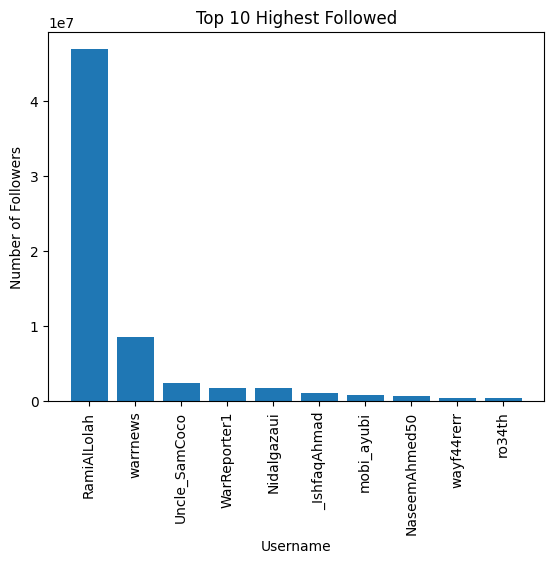

In [8]:
influencers = df.groupby('username')['followers'].sum()
influencers = influencers.sort_values(ascending=False)

plt.bar(influencers[:10].index, influencers[:10].values)
plt.xticks(rotation=90)
plt.xlabel('Username')
plt.ylabel('Number of Followers')
plt.title('Top 10 Highest Followed')
plt.show()

# 2. Users with the highest number of status change

This shows that these people where very active in twitter. 

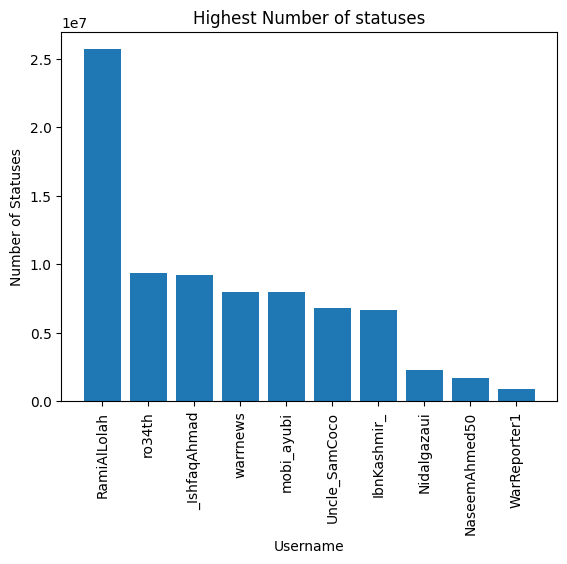

In [9]:
users = df.groupby('username')['numberstatuses'].sum()
users = users.sort_values(ascending=False)

plt.bar(users[:10].index, users[:10].values)
plt.xticks(rotation=90)
plt.xlabel('Username')
plt.ylabel('Number of Statuses')
plt.title('Highest Number of statuses')
plt.show()

# 3. The date when most activities could be seen in this dataset

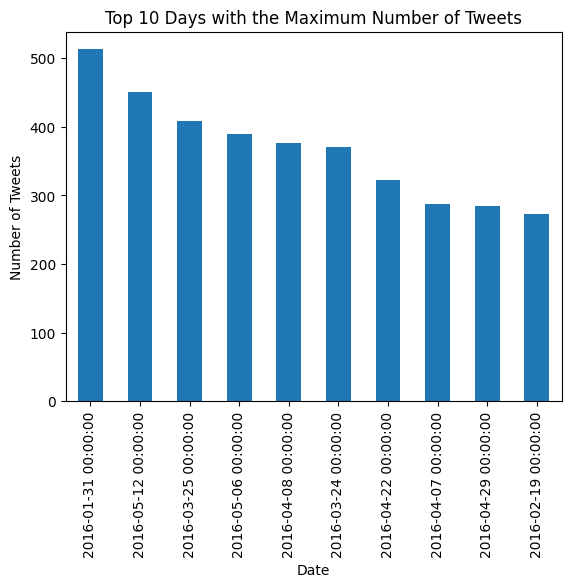

In [10]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
date_counts = df.groupby('date')['tweets'].count()
top_10_dates = date_counts.sort_values(ascending=False).head(10)

top_10_dates.plot(kind='bar')

plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Top 10 Days with the Maximum Number of Tweets')

# Show the plot
plt.show()

# 4. Time of the day when there is most number of tweets

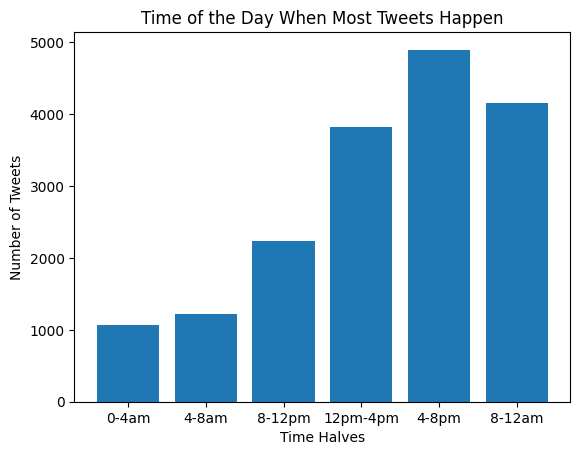

In [11]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

df['time_num'] = df['time'].apply(lambda t: datetime.timedelta(hours=t.hour, minutes=t.minute, seconds=t.second).total_seconds() / 3600)

time_bins = [0, 4, 8, 12, 16, 20, 24]
df['time_half'] = pd.cut(df['time_num'], bins=time_bins, labels=['0-4am', '4-8am', '8-12pm', '12pm-4pm', '4-8pm', '8-12am'])

date_time_counts = df.groupby(['time_half'])['tweets'].count()

plt.bar(date_time_counts.index, date_time_counts.values)

plt.xlabel('Time Halves')
plt.ylabel('Number of Tweets')
plt.title('Time of the Day When Most Tweets Happen')

plt.show()

# 5. Filtering out Tweets based on Location

In [12]:
# Since the above analogy is done using existing dataset, we will have to re-import the dataset.

loc_df = pd.read_csv("/content/drive/MyDrive/tweets.csv")
loc_df.drop_duplicates(inplace = True)
loc_df.dropna(inplace = True)
print(f"Total number of data: {len(loc_df)}")

Total number of data: 11280


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


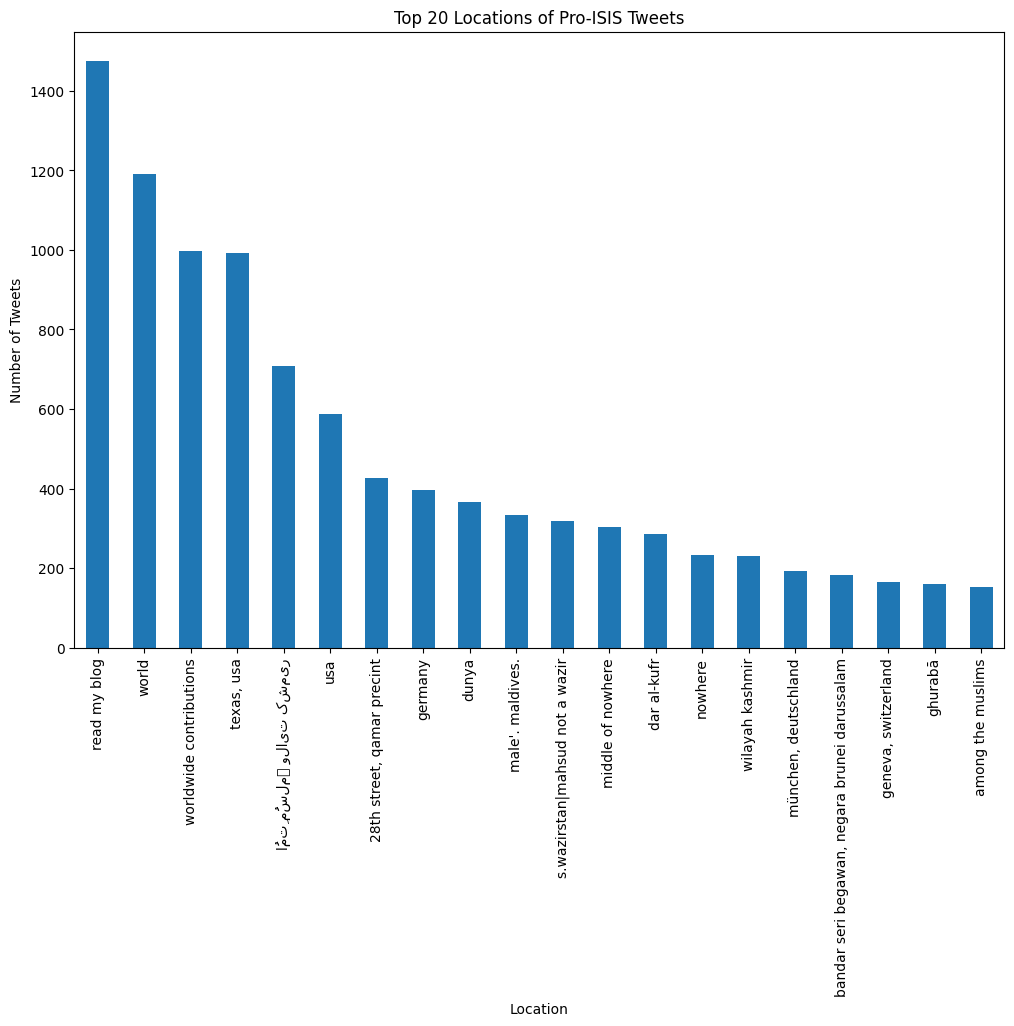

In [13]:
loc_df = loc_df.dropna(subset=['location'])

# Remove leading/trailing whitespaces and converting to lowercase
loc_df['location'] = loc_df['location'].str.strip().str.lower()

# Replace some common variations of the same location
loc_df['location'] = loc_df['location'].str.replace('united states', 'usa')
loc_df['location'] = loc_df['location'].str.replace('new york city', 'new york')
loc_df['location'] = loc_df['location'].str.replace('london, england', 'london')
loc_df['location'] = loc_df['location'].str.replace('great britain', 'uk')

# Count the number of tweets per location
location_count = loc_df['location'].value_counts()

# Plot a bar graph of the top 20 locations
plt.figure(figsize=(12,8))
location_count[:20].plot(kind='bar')
plt.title('Top 20 Locations of Pro-ISIS Tweets')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.show()


#  NOVELITY

From the above graph we know that most link are missing. This is one of the major drawbacks of this dataset and as you can see from multiple collaborators of this dataset in kaggle, there is nobody attempting to do fill missing edges in the graph. 
    We are attempting to fill in the missing edges and do a further analysis on this topic. If these edges are completed then we can do further analysis on centraility and cluster. From the ones that have tried these are having a very low edges. For example when the dataset is around 15000 rows, the edge count were around 700. We are trying to improve the method for finding missing edges.
#     **How to fill in the missing Edges ?**
1. Using retweets from various other tweets in the dataset we can try to fill in the missing edges.
2. Tagged users in different tweets including retweets
3. The most common words in the tweets can also be used to find the link between people.

# 1. PLOTTING GRAPH BASED ON RETWEETS

Major Disadvantage with this particular dataset is that there is no edges. We have used retweets to add majority of the edges. Each retweet starts from '@' and then has the username. After that this could be used to map from 1 user to another

In [14]:
G = nx.Graph()

retweet_df = df
retweet_df['is_retweet'] = df['tweets'].str.startswith('RT @')
retweet_df['original_username'] = df['tweets'].str.extract('RT @(\w+)')

retweets = retweet_df[retweet_df['is_retweet'] == True]
print("Total Retweets: ", retweets["is_retweet"].count())

# retweet_df -> consist of username and if they are retweeted.
# retweets -> consist of tweets that are re-tweeted.
retweet_counts = retweets['original_username'].value_counts()

# Username - 
for user in df['username']:
    G.add_node(user, labels = user)

for user in retweet_counts.index:
    G.add_node(user, labels = user)
    
# Create edges between users who retweeted the same original tweet
for tweet_id, group in retweets.groupby('original_username'):
    users = group['username'].unique()
    for u1 in users:
        for u2 in users:
            if u1 != u2:
                G.add_edge(u1, u2)

# Print the number of nodes and edges in the graph
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())

Total Retweets:  5824
Number of nodes: 1548
Number of edges: 1778


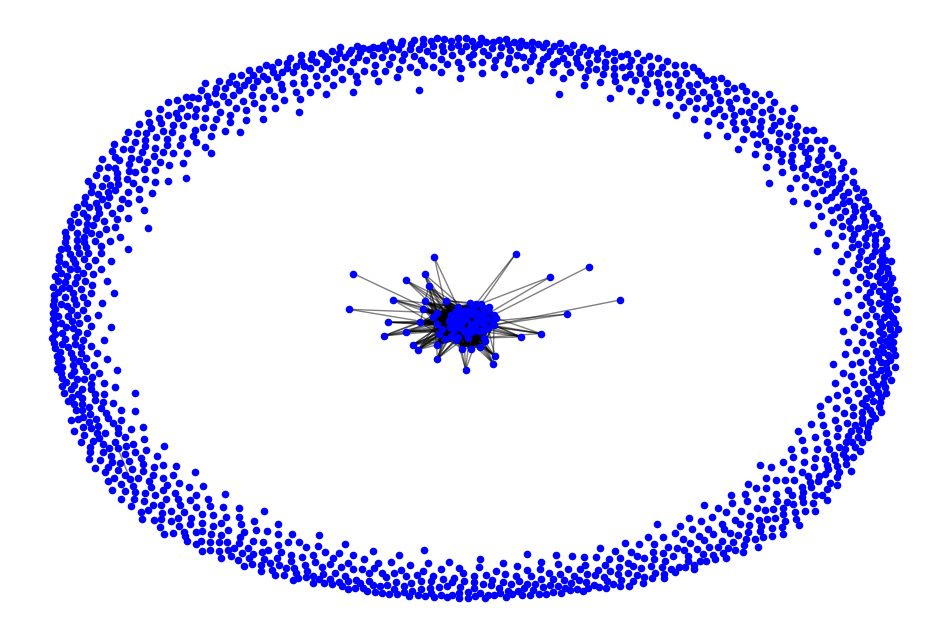

In [15]:
# Plot graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.2, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='blue')
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='black')
plt.axis('off')
plt.show()

There is only one single big cluster in the network which consist of many nodes. This cluster shows that there are nodes that are constantly retweeted and say that they are very active in terms of discussing about ISIS related tweets.

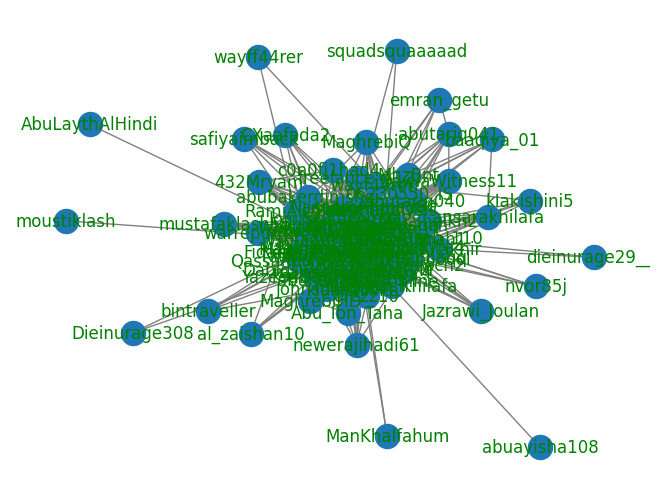

In [16]:
subgraphs = nx.connected_components(G)
largest_sg = max(subgraphs, key=len)

# create a new graph object with only the largest subgraph
subgraph = G.subgraph(largest_sg)

# draw the subgraph using a spring layout
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, font_color = "green", edge_color ="gray")

# display the plot
plt.show()

In [45]:
retweets = pd.DataFrame(columns=['retweeter', 'retweeted'])

# loop through all the rows in the dataframe
for index, row in retweets.iterrows():
    
    # check if the tweet is a retweet
    if row['tweets'].startswith('RT @'):
        
        # extract the username of the original tweet from the 'retweeted_name' column
        retweeted_name = re.findall(r'^RT\s+@+(\w+)', row["tweets"])[0]
        
        
        # add the retweeter and the retweeted to the retweets dataframe
        retweeter = row['username']
        retweets = retweets.append({'retweeter': retweeter, 'retweeted': retweeted_name}, ignore_index=True)

There is a lot of relation between nodes that are retweeted. The weights in this dataframe represents the edge weight between nodes. This will show that these to users have interactions. The more the edge weight, the more interaction there is betweeen them.

# 2. FINDING MISSING EDGES USING TAGGED USERS

In [20]:
import re

index = []
for i in range(len(df['tweets'])):
    if '@' in df['tweets'][i]:
        index.append(i)
        
With_mention = df.iloc[index,:].reset_index(drop=True)
With_mention['Tagged_User'] = With_mention['tweets'].apply(lambda x: re.findall(r'@([A-Za-z0-9_]+)',str(x)))
User = With_mention['username'].unique()
With_mention['Tagged_User_Co'] = With_mention['Tagged_User'].apply(lambda x: list(set(x).intersection(User)) )
With_mention['Co_length'] = With_mention['Tagged_User_Co'].apply(lambda x: len(x))
With_mention_2 = With_mention[With_mention['Co_length']>0].reset_index(drop=True)

In [21]:
# Information about Individual tagged in each row.

for i in range(len(With_mention['tweets'])):
    frame = With_mention.iloc[i,:]
    for j in range(len(frame['Tagged_User'])):
        tmp = pd.DataFrame({'User':[frame['username']],'Mentions':[frame['Tagged_User'][j]],'Time': [frame['time']],'User_numberstatuses':[frame['numberstatuses']],'User_followers':[frame['followers']],'Weight': [1]})
        if i==0 and j==0:
            Mention_net = tmp
        else:
            Mention_net = Mention_net.append(tmp, ignore_index=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-21-087971204d19>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mention_net = Mention_net.append(tmp, ignore_index=True)
<ipython-input-21-087971204d19>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mention_net = Mention_net.append(tmp, ignore_index=True)
<ipython-input-21-087971204d19>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mention_net = Mention_net.append(tmp, ignore_index=True)
<ipython-input-21-087971204d19>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mention_net = Mention_net.append(tmp, ignore_index=True)
<ipython-input-21-087971204d19>:10: F

In [22]:
# Interactivity between Users

for i in range(len(With_mention_2['tweets'])):
    frame = With_mention_2.iloc[i,:]
    for j in range(len(frame['Tagged_User_Co'])):
        Mentioned_follower = list(df[df['username']==frame['Tagged_User_Co'][j]]['followers'])[0]
        Mehtioned_statuses = list(df[df['username']==frame['Tagged_User_Co'][j]]['numberstatuses'])[0] 
        tmp = pd.DataFrame({'Mentioned_statuses':[Mehtioned_statuses],'Mentioned_followers':[Mentioned_follower],'User':[frame['username']],'Mentions':[frame['Tagged_User_Co'][j]],'Time': [frame['time']],'User_numberstatuses':[frame['numberstatuses']],'User_followers':[frame['followers']],'Weight': [1]})
        if i==0 and j==0:
            Mention_net_2 = tmp
        else:
            Mention_net_2 = Mention_net_2.append(tmp, ignore_index=True)

<ipython-input-22-395ba472f5b4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mention_net_2 = Mention_net_2.append(tmp, ignore_index=True)
<ipython-input-22-395ba472f5b4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mention_net_2 = Mention_net_2.append(tmp, ignore_index=True)
<ipython-input-22-395ba472f5b4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mention_net_2 = Mention_net_2.append(tmp, ignore_index=True)
<ipython-input-22-395ba472f5b4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mention_net_2 = Mention_net_2.append(tmp, ignore_index=True)
<ipython-input-22-395ba472f5b4>:12: FutureWarning: The frame.append meth

In [23]:
Mention_net = Mention_net[Mention_net['User']!=Mention_net['Mentions']]
Mention_net_2 = Mention_net_2[Mention_net_2['User']!=Mention_net_2['Mentions']]

Mention_net = Mention_net.reset_index(drop=True)
Mention_net_2 = Mention_net_2.reset_index(drop=True)

In [24]:
Mention_net.head(10)

,User,Mentions,Time,User_numberstatuses,User_followers,Weight
0,GunsandCoffee70,KhalidMaghrebi,22:17:00,49,640,1
1,GunsandCoffee70,seifulmaslul123,22:17:00,49,640,1
2,GunsandCoffee70,CheerLeadUnited,22:17:00,49,640,1
3,GunsandCoffee70,KhalidMaghrebi,00:08:00,49,640,1
4,GunsandCoffee70,seifulmaslul123,00:08:00,49,640,1
5,GunsandCoffee70,CheerLeadUnited,00:08:00,49,640,1
6,GunsandCoffee70,IbnNabih1,00:08:00,49,640,1
7,GunsandCoffee70,IbnNabih1,10:54:00,49,640,1
8,GunsandCoffee70,MuwMedia,10:54:00,49,640,1
9,GunsandCoffee70,Dawlat_islam7,10:54:00,49,640,1


In [25]:
Mention_net_2.head(10)

,Mentioned_statuses,Mentioned_followers,User,Mentions,Time,User_numberstatuses,User_followers,Weight
0,16688,29209,YazeedDhardaa25,RamiAlLolah,20:58:00,127,904,1
1,16688,29209,YazeedDhardaa25,RamiAlLolah,08:03:00,127,904,1
2,16688,29209,YazeedDhardaa25,RamiAlLolah,08:04:00,127,904,1
3,16688,29209,YazeedDhardaa25,RamiAlLolah,18:56:00,127,823,1
4,16688,29209,YazeedDhardaa25,RamiAlLolah,18:56:00,127,823,1
5,16688,29209,YazeedDhardaa25,RamiAlLolah,18:56:00,127,823,1
6,16688,29209,YazeedDhardaa25,RamiAlLolah,05:01:00,127,823,1
7,16688,29209,YazeedDhardaa25,RamiAlLolah,14:18:00,127,823,1
8,16688,29209,WhiteCat_7,RamiAlLolah,12:02:00,798,362,1
9,16688,29209,abuhanzalah10,RamiAlLolah,13:06:00,47,128,1


Using  **IN DEGREE AND OUT DEGREE**  we can figure out how many times a user has been tagged by someone else.

In [26]:
In_degree = Mention_net.groupby(by=['Mentions'],as_index=False)['Weight'].sum()
Out_degree= Mention_net.groupby(by=['User'],as_index=False)['Weight'].sum()

In_degree = pd.DataFrame(In_degree).sort_values(by='Weight',ascending=False).reset_index(drop=True)
Out_degree = pd.DataFrame(Out_degree).sort_values(by='Weight',ascending=False).reset_index(drop=True)


In [27]:
# Top Highest people who have been mentioned
In_degree.head(5)

,Mentions,Weight
0,RamiAlLolah,565
1,Nidalgazaui,336
2,WarReporter1,135
3,7layers_,116
4,ScotsmanInfidel,79


Rami AlLolah is one of the most influential people in these users. He/she has been tagged 565 times. He/She must be one of the most influential person in this dataset.

In [28]:
Out_degree.head(5)

,User,Weight
0,Uncle_SamCoco,1578
1,mobi_ayubi,1078
2,warrnews,659
3,RamiAlLolah,647
4,melvynlion,638


Uncle_SamCoco has mentioned a lot of people. He has mentioned 1578 users. He is an active user in this community. RamiAlLolah also has mentioned a lot of users. He was even one of the highest mentioned people in the community.

In [29]:
# Pair mentioned users and the user who mentioned them.

network1 = Mention_net.iloc[:,[0,1,5]]
network1 = network1.groupby(by=['Mentions','User'],as_index='False')['Weight'].sum().reset_index(name='Weight')
network1= pd.DataFrame(network1).sort_values(by='Weight',ascending=False).reset_index(drop=True)
network1 = network1[network1['Weight']>20]
print('The 10 most frequent tagged user pairs are ')
network1.iloc[0:10,:]

The 10 most frequent tagged user pairs are 


,Mentions,User,Weight
0,RamiAlLolah,mobi_ayubi,195
1,Nidalgazaui,warrnews,184
2,ScotsmanInfidel,melvynlion,79
3,DidyouknowVS,warreporter2,70
4,sparksofirhabi3,melvynlion,63
5,spicylatte123,melvynlion,61
6,Ele7vn,melvynlion,58
7,1_texanna,melvynlion,56
8,sassysassyred,melvynlion,54
9,kafirkaty,melvynlion,48


From the above we know that the most influential node RamiAlLolah is mentioned the most by mobi_aybi. But the other thing that we notice is that **melvynlion** has been mentioning a lot of the users. This says that he interacts with a lot of different users in the group.

(-1.2070521593819699,
 1.2097198884480604,
 -1.2091927295532137,
 1.209192751038609)

<Figure size 640x480 with 0 Axes>

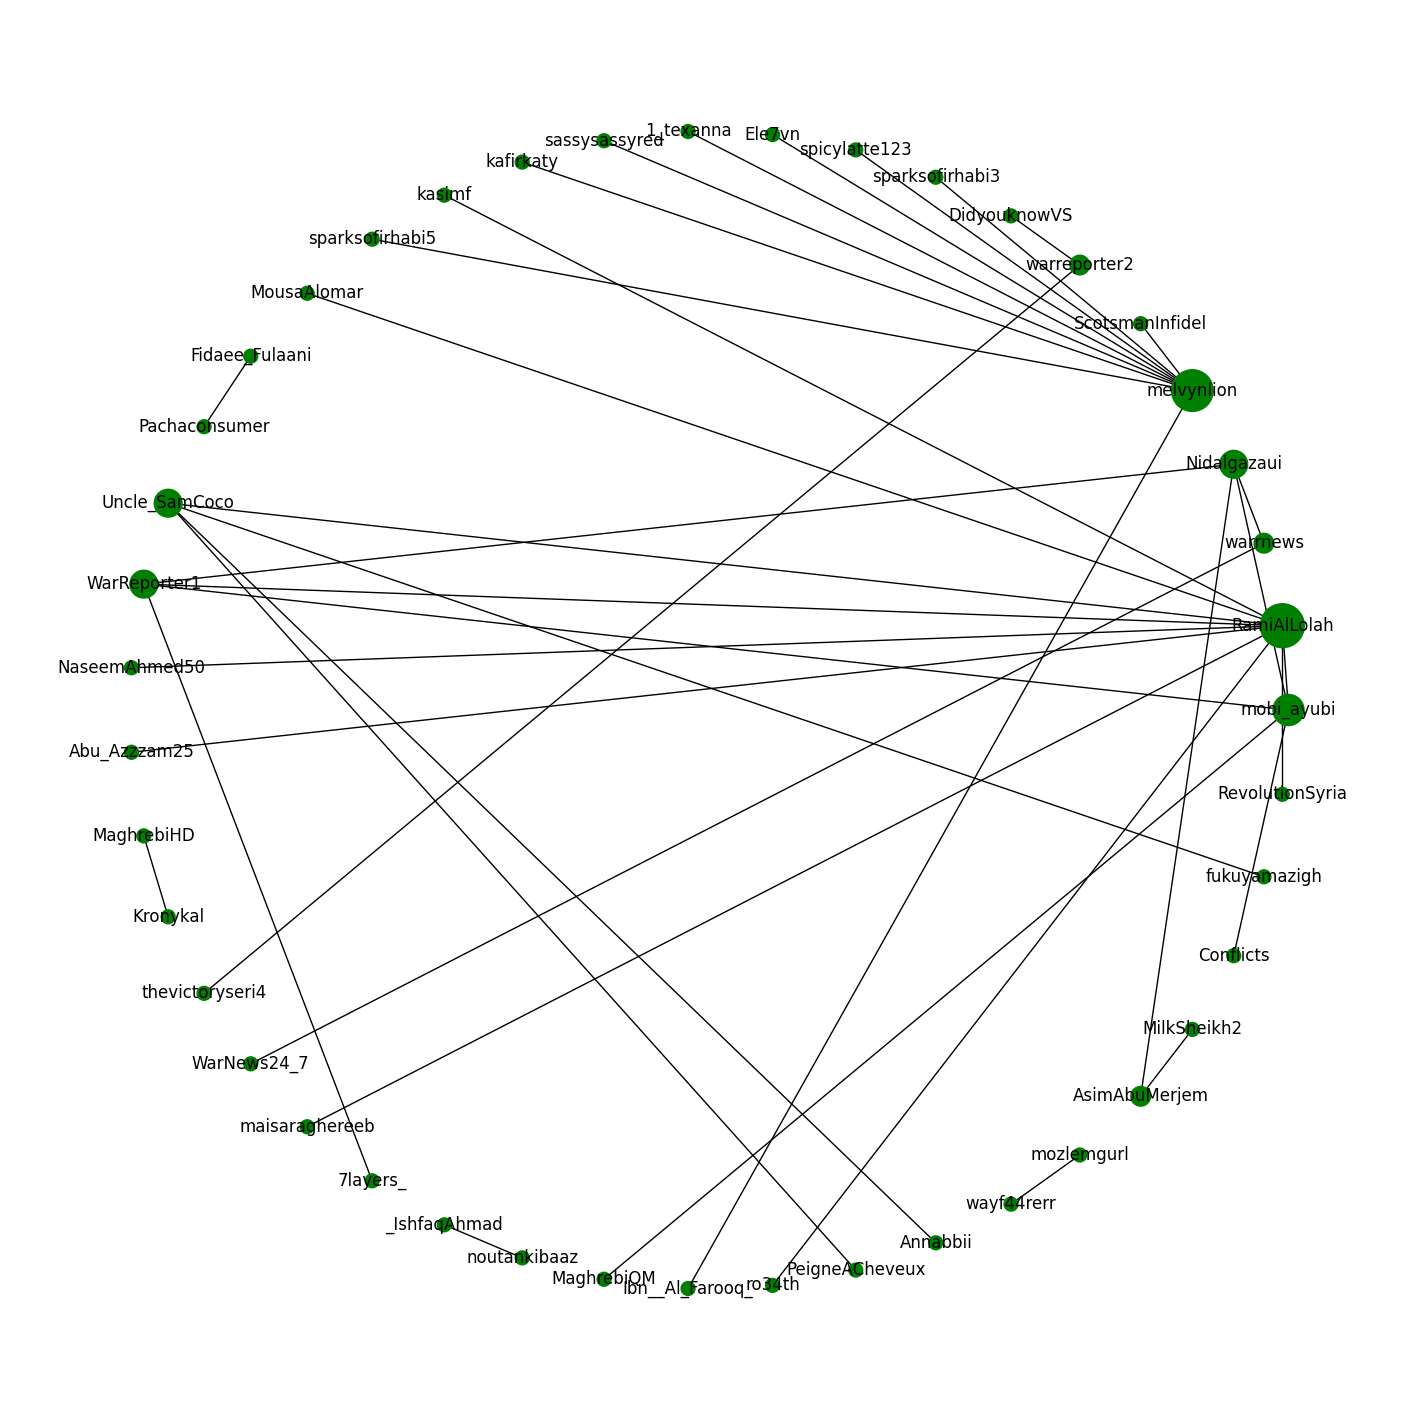

In [30]:
G = nx.Graph()
for i in range(len(network1['User'])):
    G.add_edge(network1['User'][i],network1['Mentions'][i],weight=network1['Weight'][i])
    
plt.figure(1)
plt.figure(figsize=(14,14))
d = dict(nx.degree(G))
nx.draw_circular(G,node_color='green', edge_color='black', node_size=[v*100 for v in d.values()],with_labels=True)
plt.axis('equal')

# 3. Finding the most common words in the tweet

In [31]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [33]:
df

,name,username,followers,numberstatuses,time,tweets,date,time_num,time_half,is_retweet,original_username
0,GunsandCoffee,GunsandCoffee70,640,49,21:07:00,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...,2015-01-06,21.116667,8-12am,False,NaN
1,GunsandCoffee,GunsandCoffee70,640,49,21:27:00,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...,2015-01-06,21.450000,8-12am,False,NaN
2,GunsandCoffee,GunsandCoffee70,640,49,21:29:00,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...,2015-01-06,21.483333,8-12am,False,NaN
3,GunsandCoffee,GunsandCoffee70,640,49,21:37:00,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...,2015-01-06,21.616667,8-12am,False,NaN
4,GunsandCoffee,GunsandCoffee70,640,49,21:45:00,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...,2015-01-06,21.750000,8-12am,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17405,Anaksabil97,nvor85j,238,133,15:46:00,#Breaking\n#IslamicState \n#AmaqAgency \n\n#Fr...,2016-05-13,15.766667,12pm-4pm,False,NaN
17406,Anaksabil97,nvor85j,238,133,15:50:00,#Breaking\n\n Iraqi forces bulldozer destroyed...,2016-05-13,15.833333,12pm-4pm,False,NaN
17407,Anaksabil97,nvor85j,238,133,15:51:00,#Breaking \n#AmaqAgency \n#IslamicState \n\n#E...,2016-05-13,15.850000,12pm-4pm,False,NaN
17408,Anaksabil97,nvor85j,238,133,16:07:00,#PhotoReport \n#WilayatDimasiqh \n\n📷The Condu...,2016-05-13,16.116667,4-8pm,False,NaN


In [36]:
tweets_df = df
stop_words = set(stopwords.words('english'))
def preprocess_tweet_text(tweet):
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation)).lower()
    tokens = word_tokenize(tweet)
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if len(token) > 1]
    return tokens

# Tokenize and count the frequency of words in each tweet
all_tokens = []
for tweet in tweets_df['tweets']:
    tokens = preprocess_tweet_text(tweet)
    all_tokens.extend(tokens)
word_freq = Counter(all_tokens)


word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'word_frequency']).sort_values('word_frequency', ascending=False)

# Filter the words by frequency
min_freq = 5
max_freq = 100

# filter words with minimum frequency of 5
word_freq_df = word_freq_df[word_freq_df['word_frequency'] >= min_freq]
word_freq_df = word_freq_df[word_freq_df['word'] != 'rt']

filtered_words = [word for word, freq in word_freq.items() if freq >= min_freq and freq <= max_freq]
filtered_words = [word for word in filtered_words if len(word) > 1]
word_freq_df


,word,word_frequency
666,isis,2373
4,syria,1521
220,amp,1359
419,killed,1292
86,us,917
...,...,...
14304,butchered,5
3317,ny,5
14548,somebody,5
3316,f1ea1337,5


These are some of the most commonly used words in the tweets. This clearly says that most tweets are about mass killing and relation between the syria and ISIS. The US keyword has been repeated 917 times, which makes sense because initially the graph which we plotted about the tweet location, it had so many tweets coming from USA. This says that there are many pro-ISIS users in USA.